Tools and Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.register_matplotlib_converters()

In [2]:
import numpy as np
import random

In [34]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [3]:
random.seed(12)

Loading Dataset

In [4]:
file_path = r'C:\Users\Daniel\Desktop\ML PROJECTS\Rain in Australia\weatherAUS.csv'

weather = pd.read_csv(file_path, parse_dates=True)

Data Exploration

In [5]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
weather.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Data Exploration

In [21]:
# Splitting Dataset
weather_tr_val, weather_test = train_test_split(weather, test_size=0.2, random_state=23)
weather_train, weather_val = train_test_split(weather_tr_val, test_size=0.2, random_state=23) # creating validation set from training set

In [24]:
weather_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
132436,2015-11-09,Hobart,12.9,32.5,0.0,6.2,4.4,NNW,61.0,NW,...,33.0,17.0,1011.3,1006.2,7.0,7.0,21.4,31.9,No,No
112488,2011-06-27,Witchcliffe,11.0,20.0,5.0,NaN,NaN,NNW,69.0,N,...,76.0,84.0,NaN,NaN,NaN,NaN,14.4,17.6,Yes,Yes
32350,2014-04-13,Sydney,16.0,20.6,3.8,1.4,1.0,SSE,52.0,SW,...,86.0,88.0,1016.8,1016.1,7.0,7.0,17.8,18.5,Yes,Yes
39516,2017-06-04,WaggaWagga,-1.2,15.0,0.0,NaN,NaN,W,19.0,E,...,79.0,50.0,1029.3,1025.6,NaN,5.0,6.0,14.8,No,No
120247,2016-05-31,PerthAirport,8.0,20.8,0.0,2.2,9.2,NE,30.0,NE,...,60.0,37.0,1021.4,1019.0,1.0,6.0,12.6,20.4,No,No


In [25]:
weather_train['Location'].value_counts()

Canberra            2214
Sydney              2181
Brisbane            2090
Melbourne           2088
Darwin              2059
Perth               2042
Adelaide            2024
Launceston          1994
Hobart              1990
Cairns              1986
MountGinini         1974
Portland            1968
Albury              1963
Albany              1962
Tuggeranong         1956
AliceSprings        1955
PearceRAAF          1948
Dartmoor            1948
NorahHead           1947
Newcastle           1945
Walpole             1945
Ballarat            1937
CoffsHarbour        1937
SalmonGums          1935
PerthAirport        1934
NorfolkIsland       1933
Penrith             1931
Sale                1931
Townsville          1928
Cobar               1927
Moree               1926
Richmond            1923
MelbourneAirport    1923
Bendigo             1921
MountGambier        1919
Woomera             1918
WaggaWagga          1917
Mildura             1914
Nuriootpa           1914
BadgerysCreek       1910


array([[<AxesSubplot: title={'center': 'Evaporation'}>,
        <AxesSubplot: title={'center': 'Sunshine'}>,
        <AxesSubplot: title={'center': 'WindGustSpeed'}>],
       [<AxesSubplot: title={'center': 'Humidity9am'}>,
        <AxesSubplot: title={'center': 'Humidity3pm'}>,
        <AxesSubplot: title={'center': 'Cloud9am'}>],
       [<AxesSubplot: title={'center': 'Cloud3pm'}>,
        <AxesSubplot: title={'center': 'Rainfall'}>,
        <AxesSubplot: title={'center': 'MaxTemp'}>]], dtype=object)

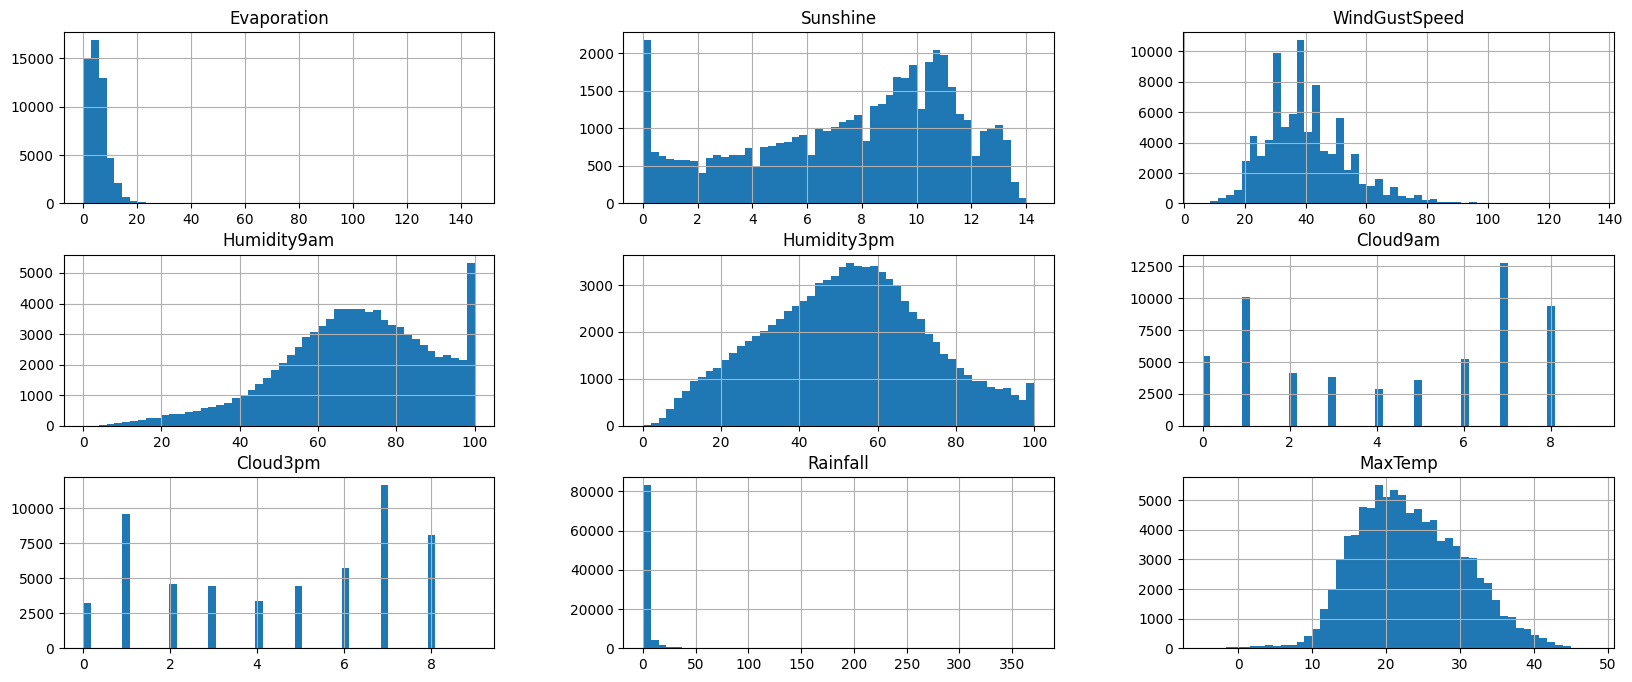

In [32]:
# Observing some histograms
dubious_attributes = ['Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Rainfall', 'MaxTemp']
weather_train[dubious_attributes].hist(bins=50, figsize=(20, 8))